In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, Naive
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

# Suppress future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the data
df = pd.read_csv('data.csv')
df['Page.Loads'] = df['Page.Loads'].replace(",", "", regex=True).astype("int")
df['Date'] = pd.to_datetime(df['Date'])

# Preparing data
df = df[['Date', 'Page.Loads']]
df.columns = ['ds', 'y']
df['unique_id'] = 1


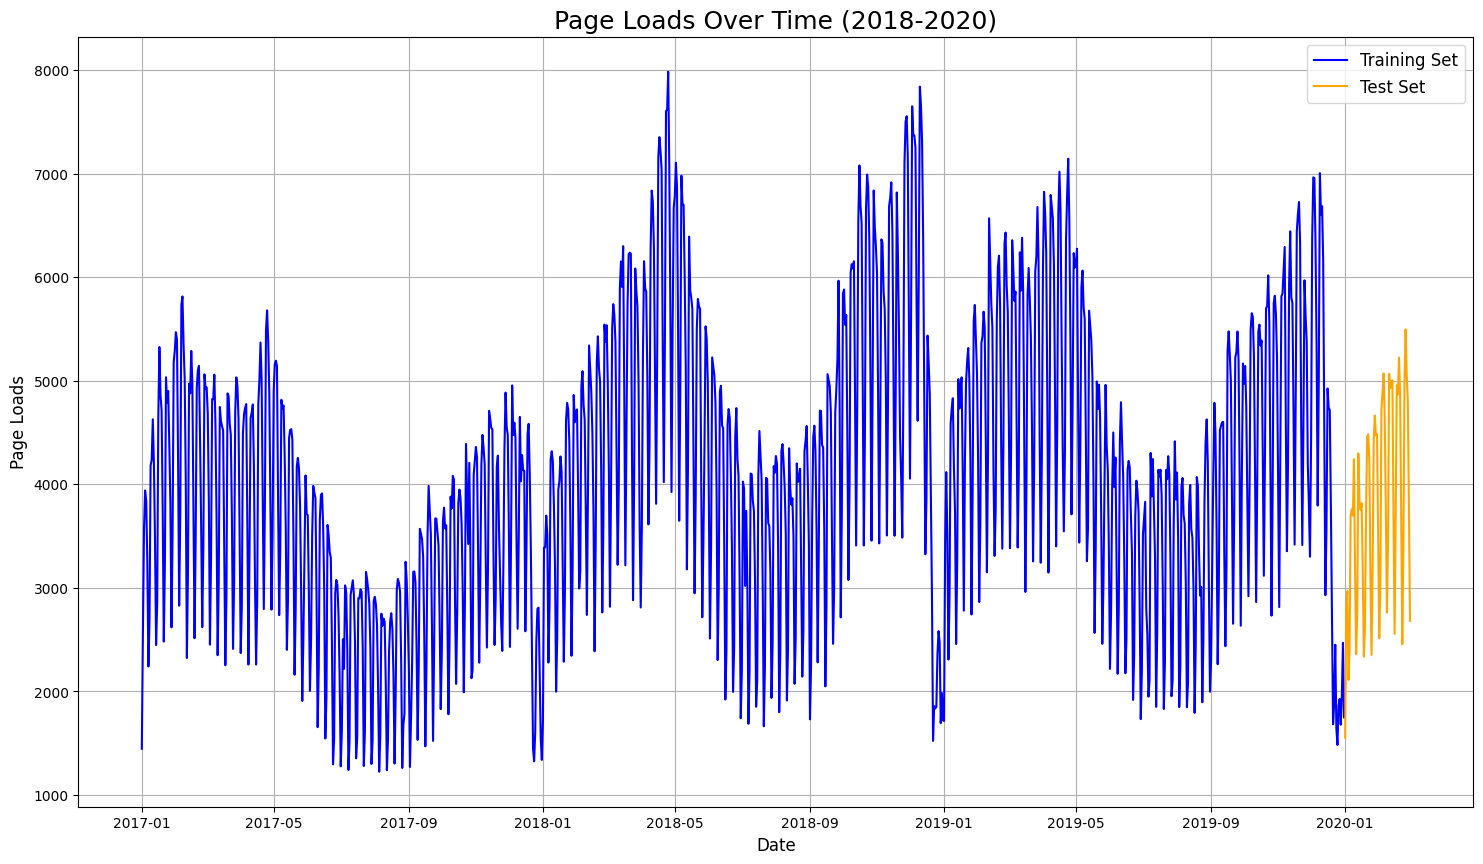

In [144]:
# Set the training and testing period
training_end_date = '2020-01-01'
test_start_date = '2020-01-01'
test_end_date = '2020-03-01'

# Filter data for the training range
y_train = df[(df['ds'] >= '2017-01-01') & (df['ds'] < training_end_date)]

# Filter data for the test range
y_test = df[(df['ds'] >= test_start_date) & (df['ds'] < test_end_date)]

# Plotting the results
plt.figure(figsize=(18, 10))
plt.plot(y_train['ds'], y_train['y'], label='Training Set', color='blue')
plt.plot(y_test['ds'], y_test['y'], label='Test Set', color='orange')
plt.title('Page Loads Over Time (2018-2020)', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Page Loads', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [150]:
# Define the models and forecast settings
models = [AutoARIMA(season_length=7), AutoETS(season_length=7), Naive()]
sf = StatsForecast(df=y_train, models=models, freq='D', n_jobs=1)

In [151]:
# Forecast for the defined horizon
horizon = len(y_test)
y_preds = sf.forecast(horizon)

# Merge predictions with the test data
y_preds = y_preds.merge(y_test, how='left', on=('unique_id', 'ds'))

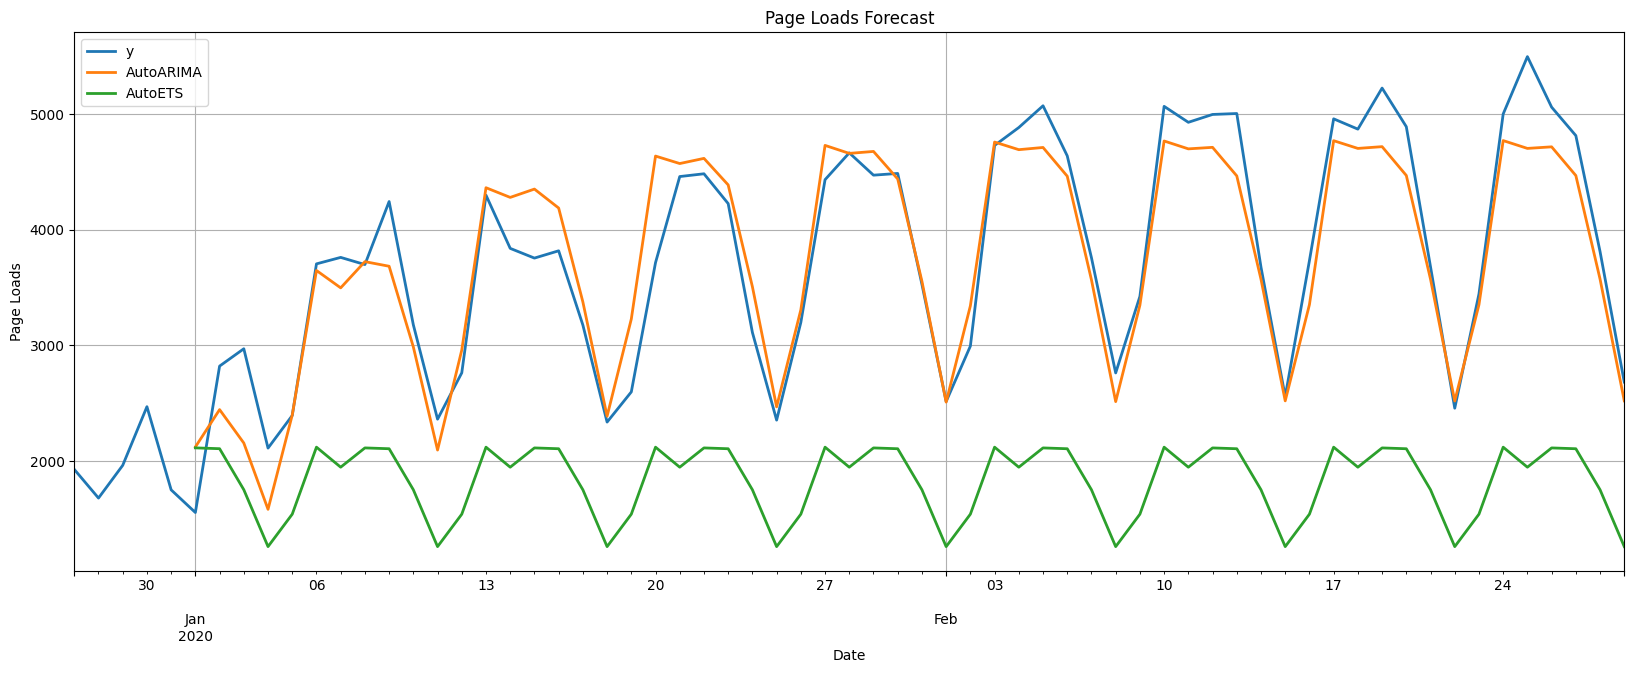

In [152]:
# Plotting the results
fig, ax = plt.subplots(figsize=(20, 7))
plot_df = pd.concat([y_train.tail(), y_preds]).set_index('ds')  # Showing last 60 days of training and the forecast
plot_df[['y', 'AutoARIMA', 'AutoETS']].plot(ax=ax, linewidth=2)
ax.set_title('Page Loads Forecast')
ax.set_ylabel('Page Loads')
ax.set_xlabel('Date')
ax.legend()
ax.grid(True)
plt.show()

In [130]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [131]:
MAE(y_preds['y'], y_preds['AutoARIMA'])

707.6309547424316

In [132]:
MAE(y_preds['y'], y_preds['AutoETS'])

1707.5010147094727

In [133]:
MAE(y_preds['y'], y_preds['Naive'])

1668.6875

In [134]:
y_preds['ensamble'] = (y_preds['AutoARIMA'] + y_preds['AutoETS'])/2

In [135]:
MAE(y_preds['y'], y_preds['ensamble'])

1207.3035163879395